<a href="https://colab.research.google.com/github/therealellam/CORE_ML_WK4/blob/main/DSP_CORE_MOD2_IP_WK4_ML_Bellah_Ellam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Defining the Question**


>  # a) Specifying the Question



This week's project requires us to implement a K-nearest neighbor (kNN) classifier  and a Naive Bayes classifier. Once we conduct the experiments, we will calculate the resulting metrics

> # b) Metrics for Success



Experimental Procedure:

- For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.
- For dataset 2, perform classification of the testing set samples using the Naive Bayes Classifier.

Compute the accuracy (percentage of correct classification).

Report the confusion matrix of each classifier.

Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

Suggest and apply at least one of the optimization techniques that you learned earlier this week.

Provide further recommendations to improve both classifiers.
Create a notebook for each project. 

> # c) Data Relevance

The dataset to use for this project can be found by following these links:. 

Download the two datasets from the given links:
- Dataset 1 Source: [Train Dataset Source: Link (Links to an external site.), Test Dataset Source: Link (Links to an external site.)]
- Dataset 2 Source: [Link (Links to an external site.)]

# **2. Importing Libraries**

In [1]:
#We first import python libraries we will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **3. Loading the Dataset**

In [2]:
#Load the Data into a dataframe
#The dataset used in this project was provided  

df=pd.read_csv('/content/train (5).csv')

#Viewing the first 5 entries
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **4. Checking the Data**

In [3]:
# Determining the no. of records in the dataset
df.shape

(891, 12)

In [4]:
# Checking whether each column has an appropriate datatype
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#Dataframe description

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **5. Tidying the Dataset**

In [ ]:
#Dropping uneccesary columns

# df.drop(columns='id', inplace= True)

In [6]:
#Checking for Missing Values

df.isnull().values.any()

True

In [7]:
# Dealing with the Missing Data

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **7. Checking for & Removing Duplicates**

In [ ]:
#checking data for duplicates
df.duplicated().values.any()

True

In [ ]:
df.duplicated().sum()

3

In [ ]:
#Dropping Duplicates

df.drop_duplicates(keep=False,inplace=True)

df.duplicated().values.any()


False

# **EXPLORATORY ANALYSIS**

# **Univariate Analysis - Categorical Variables**

In [ ]:
#checking column data type
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
#Frequency Tables

print("Condition Column Frequency table")
display(df.condition.value_counts())
print('')

print("Grade Column Frequency table")
display(df.grade.value_counts())
print('')


Condition Column Frequency table


3    14027
4     5677
5     1701
2      172
1       30
Name: condition, dtype: int64


Grade Column Frequency table


7     8981
8     6064
9     2613
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [ ]:
#Importing the seaborn library for visualization

import seaborn as sns

#setting a style

sns.set(style='whitegrid', palette='muted', color_codes=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


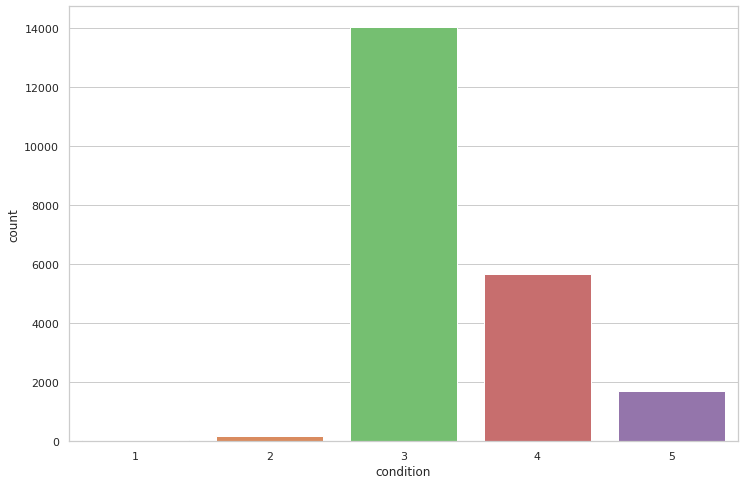

In [ ]:
#plotting the condition column
plt.figure(figsize=(12, 8))
sns.countplot(df.condition)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


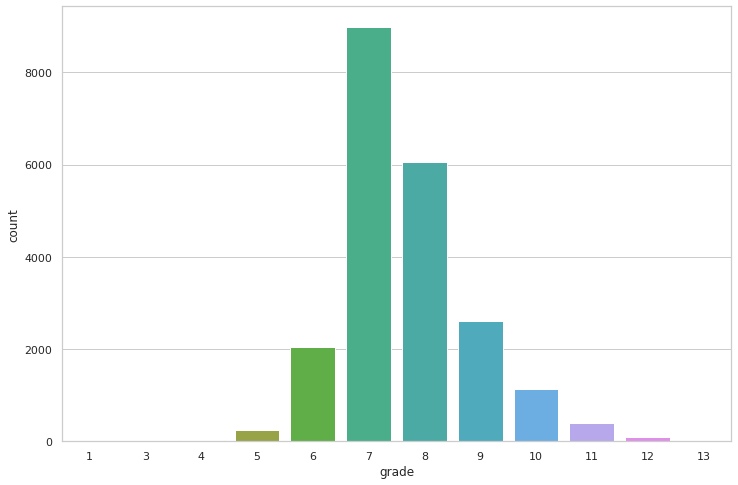

In [ ]:
#plotting the grade column
plt.figure(figsize=(12, 8))
sns.countplot(df.grade)

Grade 7 houses were more popular from the data collected

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text major ticklabel objects>)

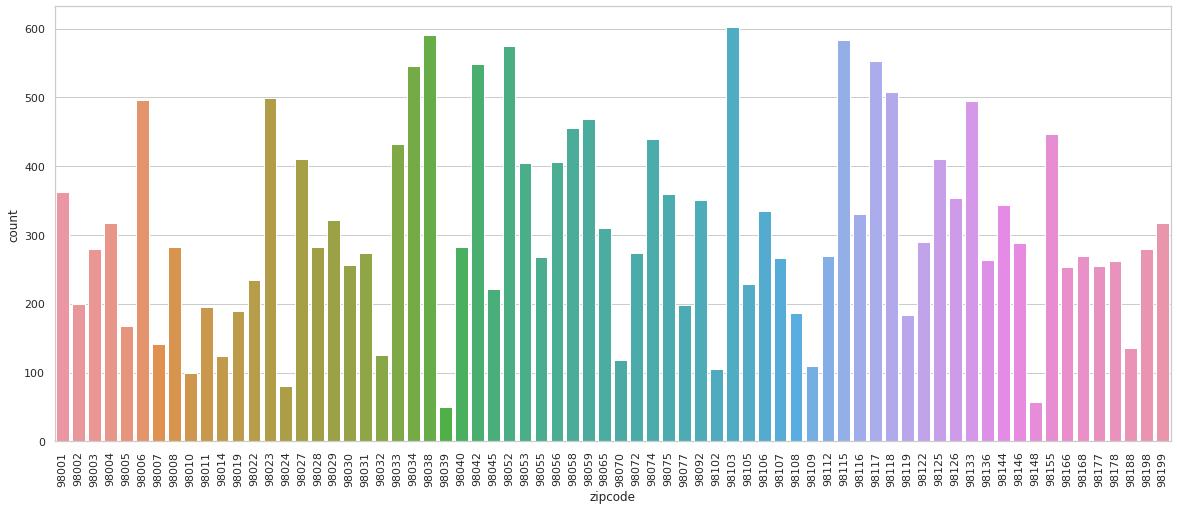

In [ ]:
#plotting the grade column
plt.figure(figsize=(20, 8))
sns.countplot(df.zipcode)
plt.xticks(rotation=90)

# **Numerical variables**

In [ ]:
pd.unique(df['floors'])

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

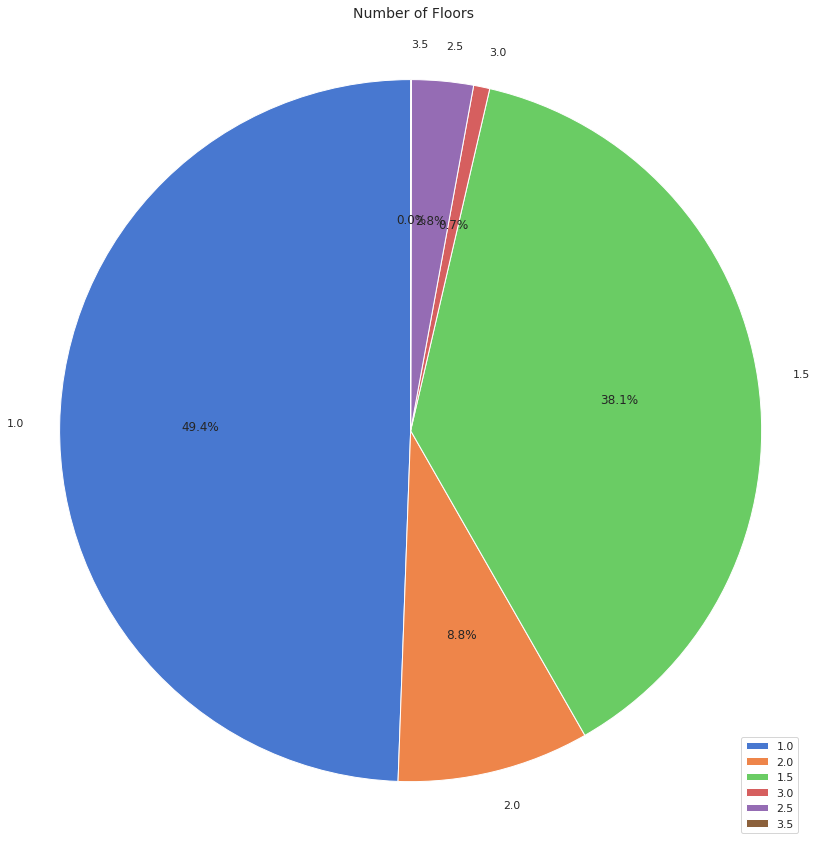

In [ ]:
tp = df['floors'].unique()
count = df.groupby(['floors'])["id"].count()

plt.figure(figsize=(14,15))
plt.pie(count, labels = tp, autopct = '%1.1f%%', shadow = False, startangle = 90)
plt.axis('equal')
plt.legend()
plt.title('Number of Floors', fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

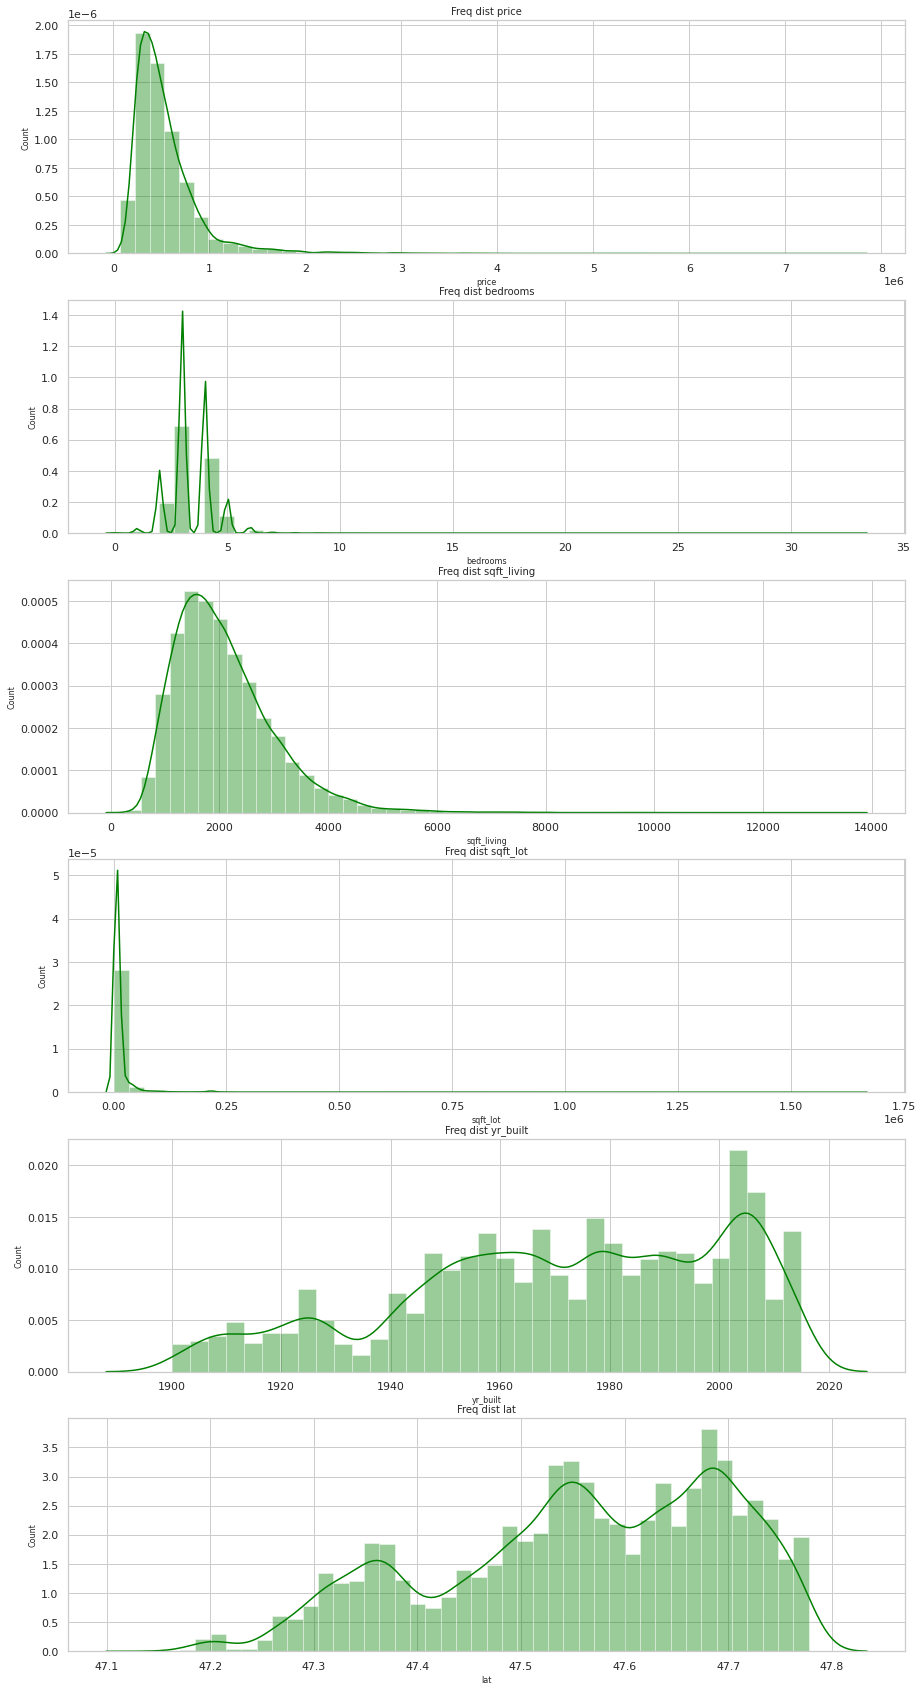

In [ ]:
#Analyzing numerical columns

col_names = ['price','bedrooms','sqft_living','sqft_lot','yr_built', 'lat']

fig, ax = plt.subplots(len(col_names), figsize=(15,30))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i],color= 'green')
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    

plt.show()

# **Bivariate Analysis**

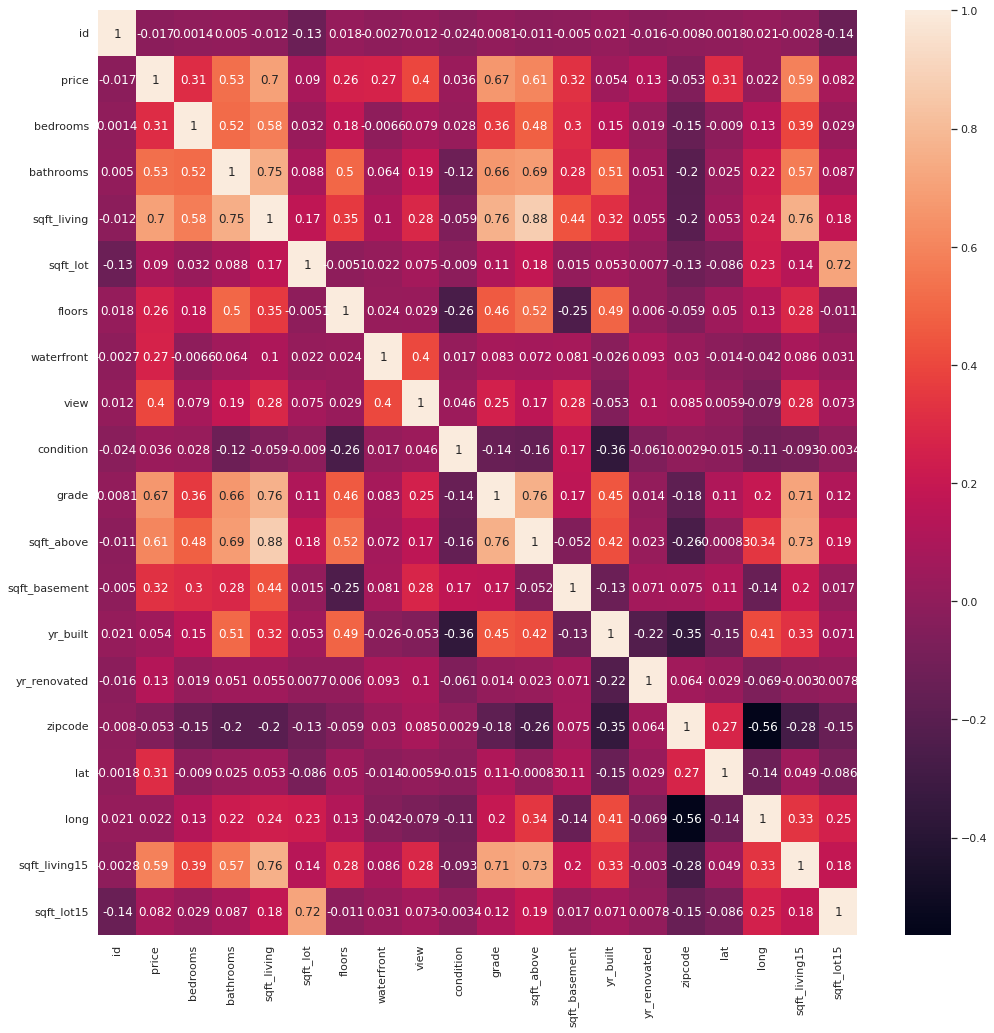

In [ ]:
#Checking varibale correlation

plt.figure(figsize=(17,17))
sns.heatmap(df.corr(), annot=True)
plt.show()

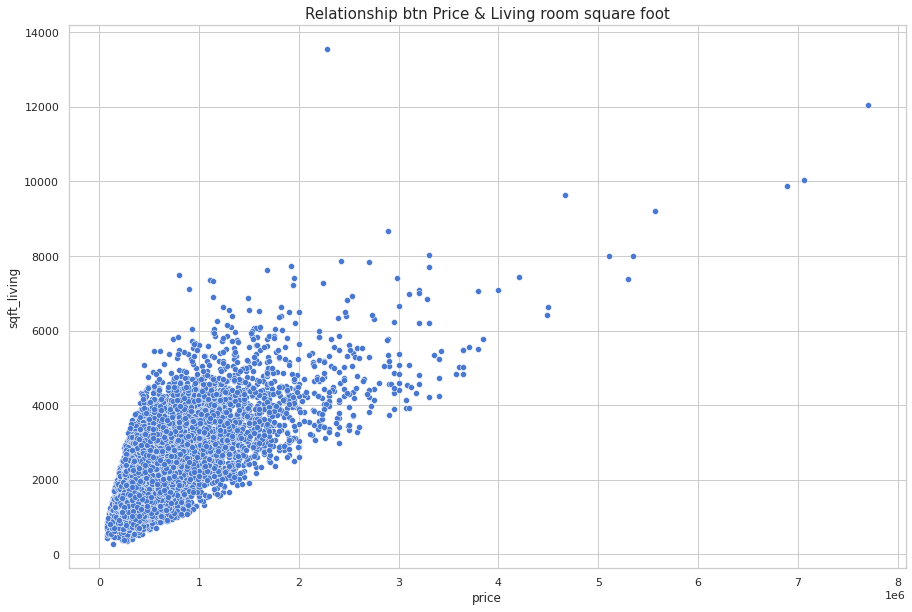

In [ ]:
#Relationship btn Price & Living room square foot

plt.figure(figsize=(15, 10))
sns.scatterplot(x='price', y='sqft_living', data=df)
plt.title('Relationship btn Price & Living room square foot', fontsize=15)
plt.show()

In [ ]:
#Relationship btn Categorical & Numerical variables

sns.pairplot(df,hue='condition')
plt.show()

#**Multivariate Analysis**

#Multivariate Regression Analysis





In [ ]:
#Making a list of Dependent & Independent variables

#separate the other attributes from the predicting attribute
x = df.drop('price',axis=1)
#separate the predicting attribute into Y for model training 
y = df['price']

In [ ]:
#Splitting the data

# importing train_test_split from sklearn

from sklearn.model_selection import train_test_split
# splitting the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
#From the sklearn module we will use the LinearRegression() method to create a linear regression object.
# This object has a method called fit() that takes the independent and dependent values as parameters 
# and fills the regression object with data that describes the relationship


# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predicting test set results

y_prediction =  LR.predict(x_test)
y_prediction

array([  84367.87283458,  330390.24541614, 1036084.82602524, ...,
        530356.38262174,  226917.60376267, 1100775.14709574])

In [ ]:
# importing r2_score module to check our model accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.6821998239045917
mean_sqrd_error is== 38030084494.494446
root_mean_squared error of is== 195013.03672958494


Text(0.5, 1.0, 'Actual vs Predicted')

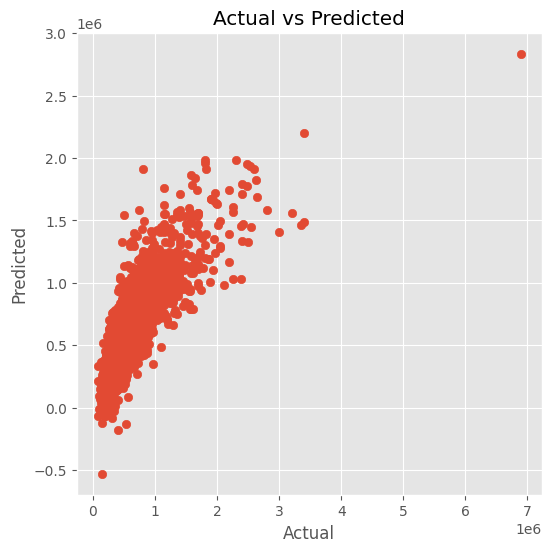

In [ ]:
#Plotting the results

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_prediction)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Actual vs Predicted')


#Quantile Regression Analysis





In [ ]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf


In [ ]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ x', df)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

In [ ]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)


#Ridge Regression Analysis





In [ ]:
#importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(x,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(x)))
print(first_model)


40501094629.69728


In [ ]:
#create our ridge model and indicate normalization in order to get better estimates
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength.
search.fit(x,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

41003795765.03559

In [ ]:
## We can confirm this by fitting our model with the ridge information and finding the mean squared error below
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(x,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(x)))
print(second_model)

40507420437.20115



#Lasso Regression Analysis





In [ ]:
# Loading our libraries
#
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(x, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(x, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(x))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6999608284704923
lasso MSE: 40501094672.67543
lasso coef: [ -3766.69192708 -33237.55604261  31584.61998728 259519.67485432
   5008.88657376   3742.7604078   50345.23699033  40831.6586881
  17153.67869608 112975.41836491 -83951.24020882 -58579.83537427
 -77069.40768071   8059.13454251 -31169.64448631  83507.29365442
 -29933.68323854  14836.20921419 -10817.41906936]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27068762899870.625, tolerance: 291664301074.9131
  positive)


In [ ]:
import warnings
warnings.filterwarnings("ignore")

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(x_train, y_train) 
linear.fit(x_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(x_test, y_test))
print("linear score:", linear.score(x_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(x_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(x_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 4.0}
lasso score: 0.6822148007932706
linear score: 0.6821998239045917
lasso MSE: 38028292260.30213
linear MSE: 38030084494.494446
lasso best estimator coef: [-9.70414639e-07 -3.57179371e+04  3.96043279e+04  2.93204822e+02
  1.47417098e-01  6.30265977e+03  6.15380732e+05  5.09685665e+04
  2.69749286e+04  9.70358345e+04 -1.04187189e+02 -1.39809951e+02
 -2.60893616e+03  2.21602364e+01 -6.01206384e+02  6.05480949e+05
 -2.23861413e+05  1.56613802e+01 -4.16655878e-01]
linear coef: [-9.69459398e-07 -3.57220250e+04  3.96173093e+04  1.14129096e+02
  1.47580423e-01  6.30716335e+03  6.15971841e+05  5.09475996e+04
  2.69886606e+04  9.70254856e+04  7.48852255e+01  3.92438702e+01
 -2.60842916e+03  2.21577934e+01 -6.01764702e+02  6.05739763e+05
 -2.24223220e+05  1.56737027e+01 -4.16447365e-01]



#Elastic Net Regression





In [ ]:
# Creating our linear regression model for the purpose of comparison
from sklearn.linear_model import ElasticNet

regression=LinearRegression()
regression.fit(x,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(x)))
print(first_model)

40501094629.69729


In [ ]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,x.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

In [ ]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(x,y)
search.best_params_
abs(search.best_score_)

41045569418.13005

In [ ]:
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(x,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(x)))
print(second_model)

79376136539.57597


# **INSIGHTS FOR IMPROVEMENT**

1. Plotting for Mulivariate regression proved to be a problem